#***BIG DATA PROJECT***

***TITLE : ANALYSIS OF YELP DATASET USING HADOOP AND SPARK***


The Yelp dataset is a subset of  businesses, reviews, and user data for use in personal, educational, and academic purposes.
Here we are using the reviews dataset for our analysis.

First set the environment for spark to start analysis.

In [ ]:
import os
os.environ["HADOOP_USER_NAME"] = "hdfs"
os.environ["PYTHON_VERSION"] = "3.8"
os.environ['PYSPARK_SUBMIT_ARGS'] = 'pyspark-shell'
os.environ["PYSPARK_PYTHON"]="/usr/local/bin/python3.8"

The dataset was loaded onto hdfs and analysis was done in spark. 

After loading data on hdfs we load the data on spark data frames using session read options 

In [ ]:
from pyspark.sql import SparkSession
sparkSession = SparkSession.builder.appName("Yelp-Data-Analysis").getOrCreate()
df = sparkSession.read.option("header","true").option("inferSchema","true").csv('hdfs://localhost:9000/user/project/Yelp_Dataset.csv',sep='\t')

Below code shows all the column in the given dataset.

In [ ]:
df.show()

+--------------------+--------------------+--------------------+-----+------+-----+----+--------------------+-------------------+
|           review_id|             user_id|         business_id|stars|useful|funny|cool|                text|               date|
+--------------------+--------------------+--------------------+-----+------+-----+----+--------------------+-------------------+
|bVTjZgRNq8Toxzvti...|2hRe26HSCAWbFRn5W...|d4qwVw4PcN-_2mK2o...|    1|     0|    0|   0|10pm on a super b...|2015-02-02 06:28:00|
|TeX0eOIeZb_wpo86r...|RR-2nouBn408e3djx...|d4qwVw4PcN-_2mK2o...|    5|     0|    0|   0|Holy heck this pl...|2017-02-09 04:25:03|
|XvLG7ReC8JZmBltOL...|-Co-ReNx_lXT1xL_R...|XZbuPXdyA0ZtTu3Az...|    4|     0|    1|   0|"As the previous ...|               null|
|FOOD: fantastic. ...|                null|                null| null|  null| null|null|                null|               null|
|Anyway like i sai...|                null|                null| null|  null| null|null|  

Below code to show the number of entries in the given dataset.

In [ ]:
df.count()

3258711

Handling NaN values

In [ ]:

df=df.na.fill(" ",subset=['review_id','business_id','user_id','text','date'])
df=df.na.fill(0,subset=['stars','useful','funny','cool'])


Checking the first 20 rows for changes

In [ ]:
df.head(20)

[Row(review_id='bVTjZgRNq8ToxzvtiVrqMA', user_id='2hRe26HSCAWbFRn5WChK-Q', business_id='d4qwVw4PcN-_2mK2o1Ro1g', stars=1, useful=0, funny=0, cool=0, text="10pm on a super bowl Sunday and they're already closed?? Weak, no wonder the hard Rock is dying off...", date='2015-02-02 06:28:00'),
 Row(review_id='TeX0eOIeZb_wpo86rCedXQ', user_id='RR-2nouBn408e3djxC470g', business_id='d4qwVw4PcN-_2mK2o1Ro1g', stars=5, useful=0, funny=0, cool=0, text="Holy heck this place is amazing. I love their chicken tacos they're by far my favorite. Great customer service and all round awesome experience.", date='2017-02-09 04:25:03'),
 Row(review_id='XvLG7ReC8JZmBltOLJzfcA', user_id='-Co-ReNx_lXT1xL_Rr0B2g', business_id='XZbuPXdyA0ZtTu3AzqtQhg', stars=4, useful=0, funny=1, cool=0, text='"As the previous person posted, what more can really be said about this restaurant. I just came back from Vegas this morning and a truly truly horrible experience.  I only went out there for a concert and the concert and this

The type() function is used to get the type of an object. When a single argument is passed to the type() function, it returns the type of the object. Its value is the same as the object.

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

Printing the schema

In [ ]:
df.printSchema()

root
 |-- review_id: string (nullable = false)
 |-- user_id: string (nullable = false)
 |-- business_id: string (nullable = false)
 |-- stars: integer (nullable = true)
 |-- useful: integer (nullable = true)
 |-- funny: integer (nullable = true)
 |-- cool: integer (nullable = true)
 |-- text: string (nullable = false)
 |-- date: string (nullable = false)



 the len() function is used to get the number of columns in the dataset

In [ ]:
len(df.columns)

9

dtypes to check the data types for individual coloumn

In [ ]:
df.dtypes

[('review_id', 'string'),
 ('user_id', 'string'),
 ('business_id', 'string'),
 ('stars', 'int'),
 ('useful', 'int'),
 ('funny', 'int'),
 ('cool', 'int'),
 ('text', 'string'),
 ('date', 'string')]

In [ ]:
df.head(7)

[Row(review_id='bVTjZgRNq8ToxzvtiVrqMA', user_id='2hRe26HSCAWbFRn5WChK-Q', business_id='d4qwVw4PcN-_2mK2o1Ro1g', stars=1, useful=0, funny=0, cool=0, text="10pm on a super bowl Sunday and they're already closed?? Weak, no wonder the hard Rock is dying off...", date='2015-02-02 06:28:00'),
 Row(review_id='TeX0eOIeZb_wpo86rCedXQ', user_id='RR-2nouBn408e3djxC470g', business_id='d4qwVw4PcN-_2mK2o1Ro1g', stars=5, useful=0, funny=0, cool=0, text="Holy heck this place is amazing. I love their chicken tacos they're by far my favorite. Great customer service and all round awesome experience.", date='2017-02-09 04:25:03'),
 Row(review_id='XvLG7ReC8JZmBltOLJzfcA', user_id='-Co-ReNx_lXT1xL_Rr0B2g', business_id='XZbuPXdyA0ZtTu3AzqtQhg', stars=4, useful=0, funny=1, cool=0, text='"As the previous person posted, what more can really be said about this restaurant. I just came back from Vegas this morning and a truly truly horrible experience.  I only went out there for a concert and the concert and this

describe() is used to view some basic statistical details like percentile, mean, std etc for the integer columns

In [ ]:
df.describe('stars').show()

+-------+------------------+
|summary|             stars|
+-------+------------------+
|  count|           3258711|
|   mean| 1.572106885207065|
| stddev|2.0853092620960285|
|    min|                 0|
|    max|                 5|
+-------+------------------+



**1. Top 10 most reviewed business**

In [ ]:

review_three= df.filter('stars >3')
group = review_three.groupby('business_id').count()
top_review = group.sort('count',ascending=False)

In [ ]:
top_review.show(10)

+--------------------+-----+
|         business_id|count|
+--------------------+-----+
|4JNXUYY8wbaaDmk3B...| 7620|
|RESDUcs7fIiihp38-...| 6883|
|f4x1YBxkLrZg652xt...| 4914|
|K7lWdNUhCbcnEvI0N...| 4739|
|DkYS3arLOhA8si5uU...| 4496|
|faPVqws-x-5k2CQKD...| 4393|
|vHz2RLtfUMVRPFmd7...| 4000|
|iCQpiavjjPzJ5_3gP...| 3921|
|cYwJA2A6I12KNkm2r...| 3879|
|QXV3L_QFGj8r6nWX2...| 3756|
+--------------------+-----+
only showing top 10 rows



In [ ]:
column=top_review.head(1)

In [ ]:
column

[Row(business_id='4JNXUYY8wbaaDmk3BPzlWw', count=7620)]

Above is the heighest reviewd business.

**2.Group the business by stars to count number of busineses under each stars.**

In [ ]:

star=df.groupby("stars").count()
star=star.filter('stars>0')
star.orderBy('stars',ascending=False).show()

+-----+------+
|stars| count|
+-----+------+
|    5|600665|
|    4|327563|
|    3|158480|
|    2|103270|
|    1|127485|
+-----+------+



**3. Get the business id where stars=5 **

In [ ]:

df.registerTempTable('yelp_table')
df1 = sqlContext.sql('select business_id from yelp_table where stars==5')
df1.show()


+--------------------+
|         business_id|
+--------------------+
|d4qwVw4PcN-_2mK2o...|
|k1c_bC3DK6mKg797v...|
|IhNASEZ3XnBHmuuVn...|
|KalAJyO0Zpg3K1wVw...|
|rcaPajgKOJC2vo_l3...|
|XwJ6fZRVbxQYRsryy...|
|e13SEvJud_vgeDR_d...|
|eaNenRk_liZBERFFL...|
|RNi6tW22UMgHwWLAb...|
|8nP8ghEpT6WFcM6tf...|
|Ec9CBmL3285XkeHaN...|
|7wHLFohwCw8l6WS-f...|
|Ec9CBmL3285XkeHaN...|
|SZEFE5hL7aN5nM-A4...|
|AtD6B83S4Mbmq0t7i...|
|RNi6tW22UMgHwWLAb...|
|VMr8sgoQOW0fo0qVJ...|
|-FtngCwHCD2tRlH8j...|
|RNi6tW22UMgHwWLAb...|
|hihud--QRriCYZw1z...|
+--------------------+
only showing top 20 rows



In [ ]:
df.head(10)

[Row(review_id='bVTjZgRNq8ToxzvtiVrqMA', user_id='2hRe26HSCAWbFRn5WChK-Q', business_id='d4qwVw4PcN-_2mK2o1Ro1g', stars=1, useful=0, funny=0, cool=0, text="10pm on a super bowl Sunday and they're already closed?? Weak, no wonder the hard Rock is dying off...", date='2015-02-02 06:28:00'),
 Row(review_id='TeX0eOIeZb_wpo86rCedXQ', user_id='RR-2nouBn408e3djxC470g', business_id='d4qwVw4PcN-_2mK2o1Ro1g', stars=5, useful=0, funny=0, cool=0, text="Holy heck this place is amazing. I love their chicken tacos they're by far my favorite. Great customer service and all round awesome experience.", date='2017-02-09 04:25:03'),
 Row(review_id='XvLG7ReC8JZmBltOLJzfcA', user_id='-Co-ReNx_lXT1xL_Rr0B2g', business_id='XZbuPXdyA0ZtTu3AzqtQhg', stars=4, useful=0, funny=1, cool=0, text='"As the previous person posted, what more can really be said about this restaurant. I just came back from Vegas this morning and a truly truly horrible experience.  I only went out there for a concert and the concert and this

In [ ]:
import pyspark.sql.functions as f

In [ ]:
df=df.withColumn("date", f.split(col("date"), " ").getItem(0))
df.show()

+--------------------+--------------------+--------------------+-----+------+-----+----+--------------------+----------+
|           review_id|             user_id|         business_id|stars|useful|funny|cool|                text|      date|
+--------------------+--------------------+--------------------+-----+------+-----+----+--------------------+----------+
|bVTjZgRNq8Toxzvti...|2hRe26HSCAWbFRn5W...|d4qwVw4PcN-_2mK2o...|    1|     0|    0|   0|10pm on a super b...|2015-02-02|
|TeX0eOIeZb_wpo86r...|RR-2nouBn408e3djx...|d4qwVw4PcN-_2mK2o...|    5|     0|    0|   0|Holy heck this pl...|2017-02-09|
|XvLG7ReC8JZmBltOL...|-Co-ReNx_lXT1xL_R...|XZbuPXdyA0ZtTu3Az...|    4|     0|    1|   0|"As the previous ...|          |
|FOOD: fantastic. ...|                    |                    |    0|     0|    0|   0|                    |          |
|Anyway like i sai...|                    |                    |    0|     0|    0|   0|                    |          |
|P.S.  Take notice...| 2009-10-1

In [ ]:
df.head(10)

[Row(review_id='bVTjZgRNq8ToxzvtiVrqMA', user_id='2hRe26HSCAWbFRn5WChK-Q', business_id='d4qwVw4PcN-_2mK2o1Ro1g', stars=1, useful=0, funny=0, cool=0, text="10pm on a super bowl Sunday and they're already closed?? Weak, no wonder the hard Rock is dying off...", date='2015-02-02'),
 Row(review_id='TeX0eOIeZb_wpo86rCedXQ', user_id='RR-2nouBn408e3djxC470g', business_id='d4qwVw4PcN-_2mK2o1Ro1g', stars=5, useful=0, funny=0, cool=0, text="Holy heck this place is amazing. I love their chicken tacos they're by far my favorite. Great customer service and all round awesome experience.", date='2017-02-09'),
 Row(review_id='XvLG7ReC8JZmBltOLJzfcA', user_id='-Co-ReNx_lXT1xL_Rr0B2g', business_id='XZbuPXdyA0ZtTu3AzqtQhg', stars=4, useful=0, funny=1, cool=0, text='"As the previous person posted, what more can really be said about this restaurant. I just came back from Vegas this morning and a truly truly horrible experience.  I only went out there for a concert and the concert and this restaurant were t

In [ ]:
df.dtypes

[('review_id', 'string'),
 ('user_id', 'string'),
 ('business_id', 'string'),
 ('stars', 'int'),
 ('useful', 'int'),
 ('funny', 'int'),
 ('cool', 'int'),
 ('text', 'string'),
 ('date', 'string')]

In [ ]:
# Obtaining a sample of the dataset for data visualization 
sample = df.limit(500000).toPandas()  
sample.head()
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    500000 non-null  object
 1   user_id      500000 non-null  object
 2   business_id  500000 non-null  object
 3   stars        500000 non-null  int32 
 4   useful       500000 non-null  int32 
 5   funny        500000 non-null  int32 
 6   cool         500000 non-null  int32 
 7   text         500000 non-null  object
 8   date         500000 non-null  object
dtypes: int32(4), object(5)
memory usage: 26.7+ MB


In [ ]:
sample.fillna(' ')
sample.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

Convert the object type of date to date format to further analysis.

In [ ]:
import pandas as pd
sample['date']=pd.to_datetime(sample['date'])
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    500000 non-null  object        
 1   user_id      500000 non-null  object        
 2   business_id  500000 non-null  object        
 3   stars        500000 non-null  int32         
 4   useful       500000 non-null  int32         
 5   funny        500000 non-null  int32         
 6   cool         500000 non-null  int32         
 7   text         500000 non-null  object        
 8   date         120085 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(4), object(4)
memory usage: 26.7+ MB


In [ ]:
sample.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1,0,0,0,10pm on a super bowl Sunday and they're alread...,2015-02-02
1,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5,0,0,0,Holy heck this place is amazing. I love their ...,2017-02-09
2,XvLG7ReC8JZmBltOLJzfcA,-Co-ReNx_lXT1xL_Rr0B2g,XZbuPXdyA0ZtTu3AzqtQhg,4,0,1,0,"""As the previous person posted, what more can ...",NaT
3,FOOD: fantastic. I went on sunday and i got t...,,,0,0,0,0,,NaT
4,"Anyway like i said, i had a horrible experienc...",,,0,0,0,0,,NaT


In [ ]:
sample.isnull().sum()

review_id           0
user_id             0
business_id         0
stars               0
useful              0
funny               0
cool                0
text                0
date           379915
dtype: int64

In [ ]:
sample=sample.fillna(0)

In [ ]:
sample.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
sample.dtypes
import datetime

Will add a day column that will indicate the day when the review was given

In [ ]:

sample['day']=sample['date'].dt.day_name()

In [ ]:
sample['day'].value_counts()

Sunday       20465
Monday       18539
Saturday     18089
Tuesday      16304
Wednesday    15883
Friday       15474
Thursday     15331
Name: day, dtype: int64

In [ ]:
pip install seaborn

  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

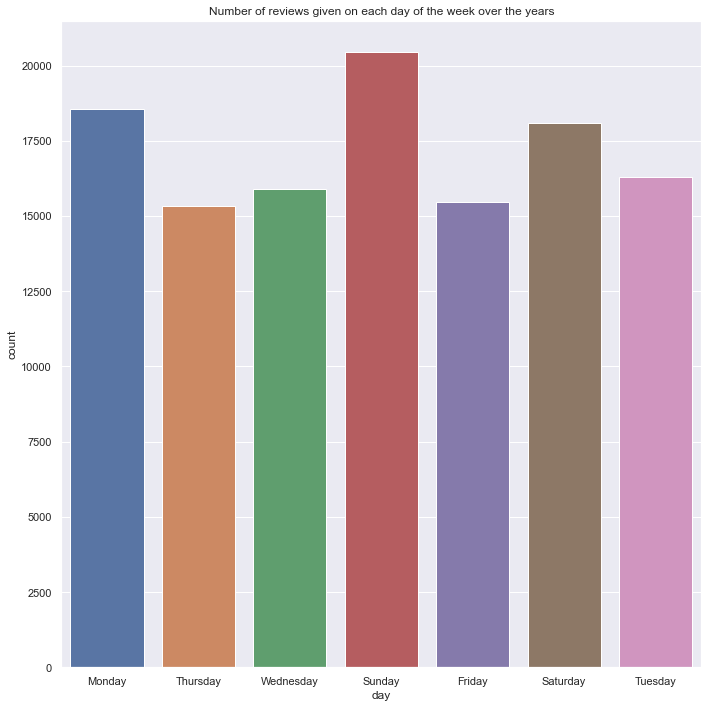

In [ ]:
figure,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
sns.countplot(x='day',data=sample,ax=ax)
ax.set_title('Number of reviews given on each day of the week over the years')
plt.tight_layout()

In [ ]:
b=sample.loc[sample['business_id'] == 'd4qwVw4PcN-_2mK2o1Ro1g']
b.dropna()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,day
0,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1,0,0,0,10pm on a super bowl Sunday and they're alread...,2015-02-02,Monday
1,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5,0,0,0,Holy heck this place is amazing. I love their ...,2017-02-09,Thursday
44,G-YhFo_55-3Br7DmF7BqeQ,3I806vywudUaWV6yVGHE2w,d4qwVw4PcN-_2mK2o1Ro1g,4,2,1,1,I was excited to finally eat here. I ordered C...,2010-01-08,Friday
814,qm-UfMPBg44gJALzaNAQjQ,yPM0X8nANqXUUrcZHVQSZQ,d4qwVw4PcN-_2mK2o1Ro1g,2,0,0,0,I don't know why people think this place is go...,2015-02-24,Tuesday
1284,FysQAsk5IgZ7R8SO2Dno9Q,GJovoapW2RNGa99tVYrCYQ,d4qwVw4PcN-_2mK2o1Ro1g,4,2,1,0,"loved my burrito, but these girls next to me h...",2012-06-26,Tuesday
...,...,...,...,...,...,...,...,...,...,...
273414,YYafPOlDVCDoyGBumy43lQ,PUe-IqmueVJZ8TcYMn7sXg,d4qwVw4PcN-_2mK2o1Ro1g,5,0,0,0,We went to the Hard Rock for a spa day! After ...,2019-09-16,Monday
275718,cMtGm60RZaJB1jrS8VEeEQ,0qj69dM7vHDqTMLBrV0U6g,d4qwVw4PcN-_2mK2o1Ro1g,5,0,0,1,"This place is is really good, Right when you w...",2018-11-27,Tuesday
278666,BkQVL2gyiArBGiXsviT3dw,0gEDwhSUIWIBz23MbLYMig,d4qwVw4PcN-_2mK2o1Ro1g,4,4,4,4,As much as I love me some pink taco (obligator...,2007-06-19,Tuesday
278828,yrx1rf2eFpMybpB9TnQYWQ,HJECayULRM-6xh2GCCvLiA,d4qwVw4PcN-_2mK2o1Ro1g,5,0,0,2,Really great Mexican fare here. Very busy plac...,2019-10-12,Saturday


<AxesSubplot:xlabel='date'>

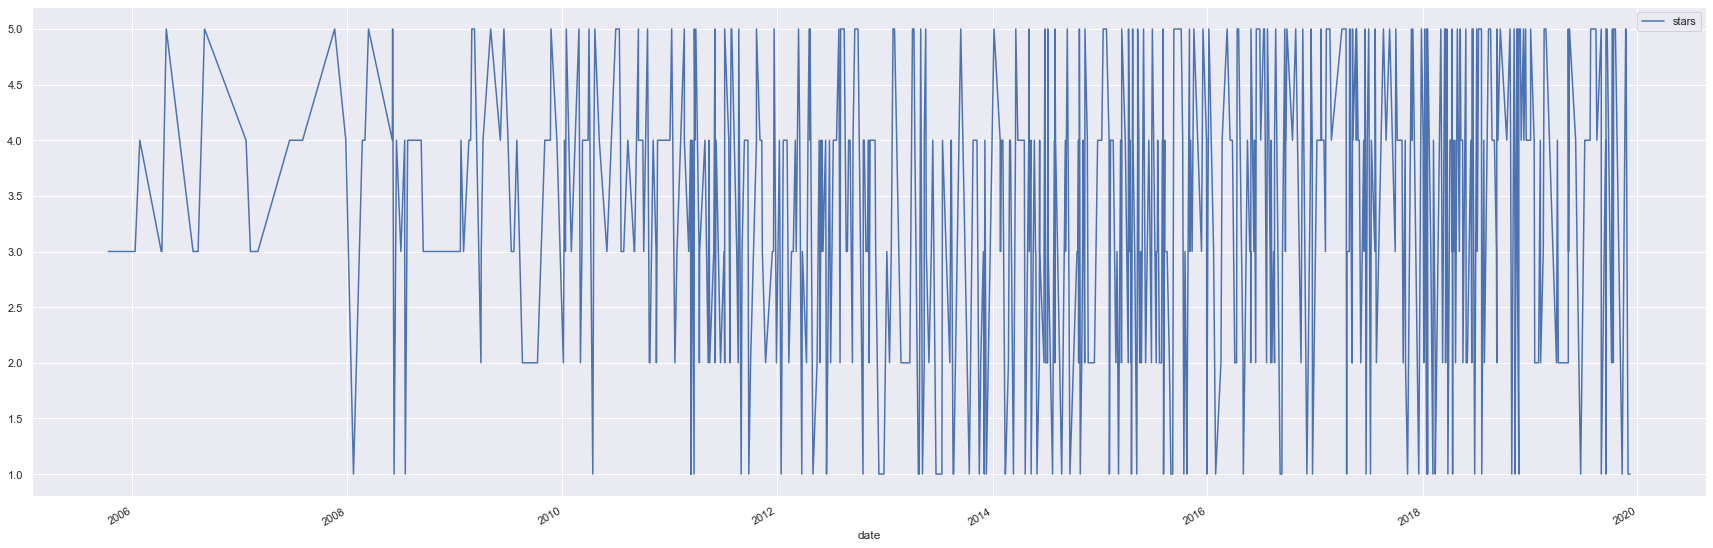

In [ ]:
b.plot(x='date',y='stars',figsize=(30,10))

The above graph shows us that the given business doesnot have a constant review opinion its been changing accordingly.

import the following packages and dependencies:


numpy,
pandas ,textblob ,nltk
nltk.corpus import stopwords.
import wordcloud,seaborn.



In [ ]:
sample['review length'] = sample['text'].apply(len)

In [ ]:
sample.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,day,review length
0,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1,0,0,0,10pm on a super bowl Sunday and they're alread...,2015-02-02,Monday,102
1,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5,0,0,0,Holy heck this place is amazing. I love their ...,2017-02-09,Thursday,144
2,XvLG7ReC8JZmBltOLJzfcA,-Co-ReNx_lXT1xL_Rr0B2g,XZbuPXdyA0ZtTu3AzqtQhg,4,0,1,0,"""As the previous person posted, what more can ...",NaT,NaN,1194
3,FOOD: fantastic. I went on sunday and i got t...,,,0,0,0,0,,NaT,NaN,1
4,"Anyway like i said, i had a horrible experienc...",,,0,0,0,0,,NaT,NaN,1


In [ ]:
sample1=sample.drop(sample[sample['stars'] == 0].index)

In [ ]:
sample1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201605 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   review_id      201605 non-null  object        
 1   user_id        201605 non-null  object        
 2   business_id    201605 non-null  object        
 3   stars          201605 non-null  int32         
 4   useful         201605 non-null  int32         
 5   funny          201605 non-null  int32         
 6   cool           201605 non-null  int32         
 7   text           201605 non-null  object        
 8   date           120085 non-null  datetime64[ns]
 9   day            120085 non-null  object        
 10  review length  201605 non-null  int64         
dtypes: datetime64[ns](1), int32(4), int64(1), object(5)
memory usage: 15.4+ MB


create five histograms based on the star rating and review length. I’m utilizing seaborn and Matplotlib packages here. Please check out the documentation for these packages to get a better understanding.

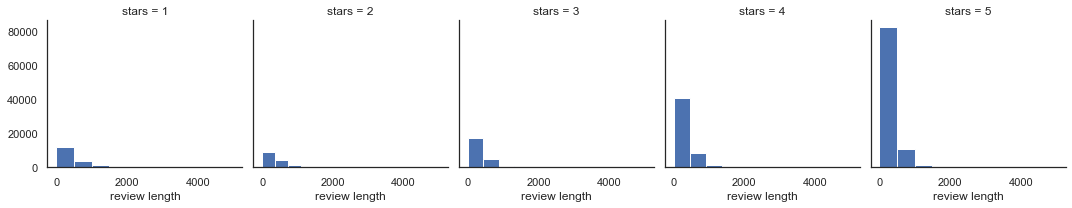

In [ ]:
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(sample1,col='stars')
g.map(plt.hist,'review length')


It seems like generally, the review length is the same except people that leave 4 and 5 stars tend to leave shorter reviews.

going to separate the reviews into “bad” and “good” reviews based on the stars. We’ll categorize “bad” as 1 and 2 stars and “good” as 4 and 5 stars. This will help us answer the questions we created previously.

In [ ]:
badreview = sample[( sample.stars <= 2 )]
goodreview = sample[(sample.stars > 3)]

Then we will remove all the columns except “text”, so we can begin our text analysis.

In [ ]:
badreviewtext=badreview.text
goodreviewtext=goodreview.text

In [ ]:
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import re, string
import sys
import collections


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saishruthi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

The next lines of code is a function that will print the most frequent N-grams in a given file.

We create four functions below. The count_ngram function utilizes the tokenize function already. We will be using the other three functions:

1.count_ngram -- Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.

2.print_most_frequent -- Print num most common n-grams of each length in n-grams dict.

3.print_word_cloud -- Print word cloud image plot







In [ ]:

def tokenize(s):
    # Converting the string to lowercase and splitting it
    # Return the final set of words excluding the stopwords
    word_list = re.findall(r'\w+', s.lower())
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    return filtered_words
def count_ngrams(lines, min_length=2, max_length=4):
    # Return a dictionary that includes the n-gram as the key and the frequency as the value
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)
    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1
   # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()
   # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()
    return ngrams
def print_most_frequent(ngrams, num=10):
    # Print the most common n-grams of each length in n-grams dict.
    for n in sorted(ngrams):
        print('----- {} most common {}-word phrase -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')
def print_word_cloud(ngrams, num=5):
    # Print word cloud image plot 
    words = []
    for n in sorted(ngrams):
        for gram, count in ngrams[n].most_common(num):
            s = ' '.join(gram)
            words.append(s)
            
    cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(words))
    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()
    print('')

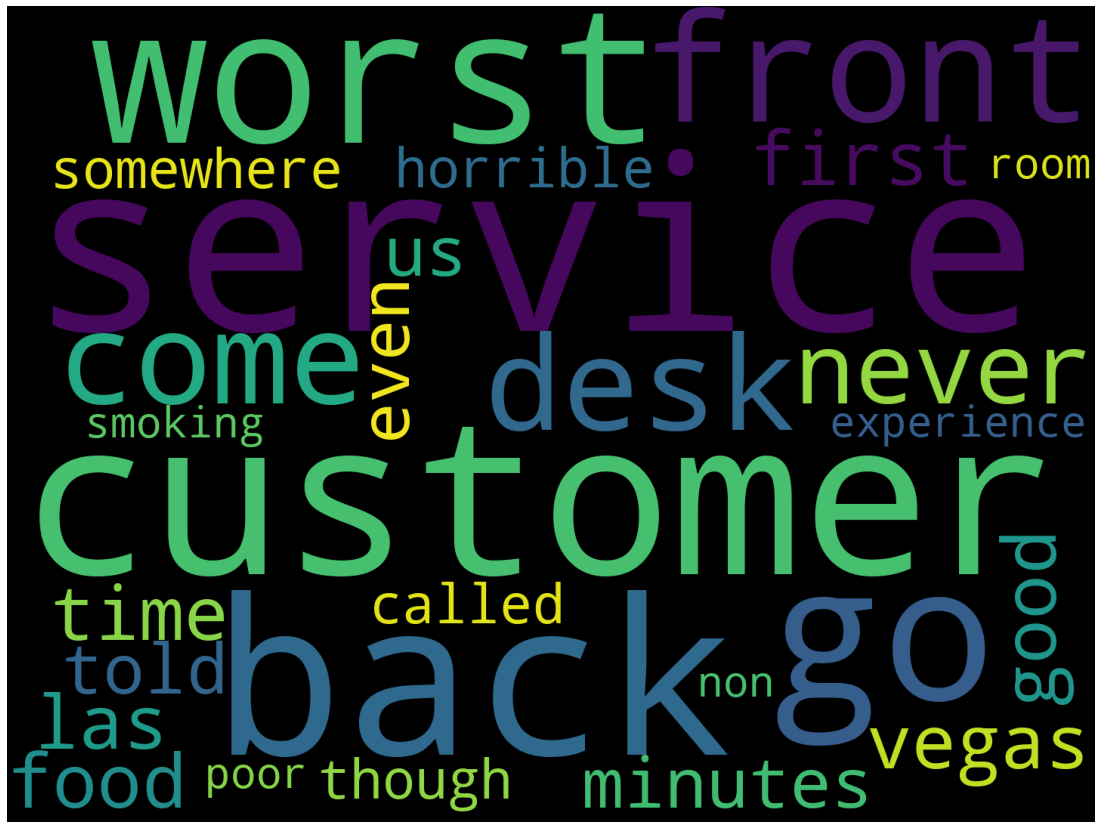

In [ ]:
most_frequent_badreviews = count_ngrams(badreviewtext,max_length=3)
print_word_cloud(most_frequent_badreviews, 10)

With the next line of code, we can see what the most frequent two-words and three-word phrases are. The formal word is called n-gram which means contiguous sequences of n-items in a sentence

In [ ]:
print_most_frequent(most_frequent_badreviews, num= 10)

----- 10 most common 2-word phrase -----
customer service: 1683
front desk: 1277
las vegas: 1176
first time: 1060
go back: 1012
food good: 870
come back: 803
20 minutes: 709
told us: 704
even though: 638

----- 10 most common 3-word phrase -----
never go back: 265
called front desk: 200
never come back: 154
worst service ever: 153
go somewhere else: 134
worst customer service: 133
horrible customer service: 133
worst experience ever: 130
poor customer service: 126
non smoking room: 125



From two-word phrases, you can see phrases like “customer service”, “20 minutes,”, which can help you understand why the customer left a bad review.

Some other phrases like “go back”, “last time”, “tasted like”, and “come back” can be assumed with some bad things, but it’s not as obvious. Therefore, you can look at three-word phrases that can bring a bit more context.

“Poor customer service”, “worst experience ever”, “asked to speak manager”, etc… provide more context. It’s obvious these businesses need a strategy or a plan to improve customer service. This is actionable insight.

The reason we don’t usually go above three-word phrases is that it’s rare to find frequent four-word phrases.

Now that we’ve seen the bad reviews, let’s look at the good ones.

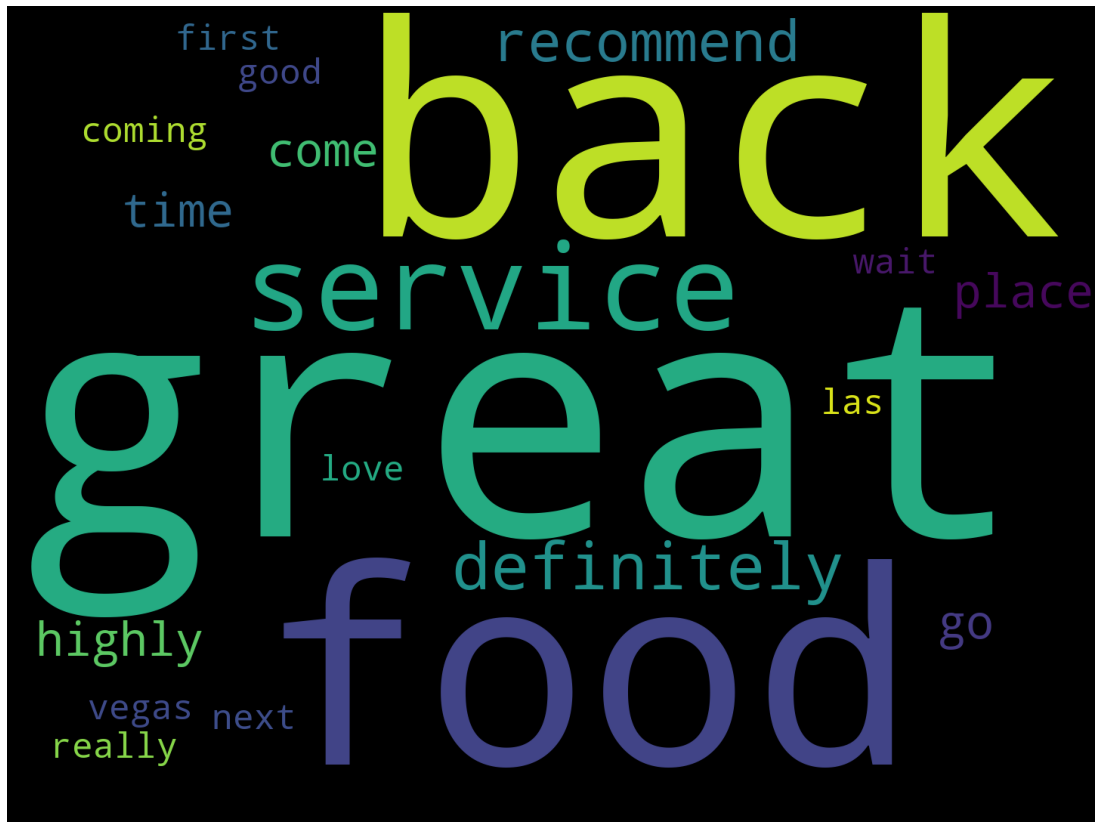

In [ ]:
most_frequent_goodreviews = count_ngrams(goodreviewtext,max_length=3)
print_word_cloud(most_frequent_goodreviews, 10)

In [ ]:
print_most_frequent(most_frequent_goodreviews, num= 10)

----- 10 most common 2-word phrase -----
las vegas: 6778
great food: 5376
first time: 5102
great service: 4826
come back: 4315
food great: 4291
love place: 4260
really good: 4173
highly recommend: 3982
service great: 3874

----- 10 most common 3-word phrase -----
definitely come back: 1197
food great service: 1047
great food great: 981
wait go back: 935
definitely coming back: 777
service great food: 682
definitely go back: 642
would definitely recommend: 642
back next time: 639
highly recommend place: 636



What does this tell us?

Customers that left good reviews seem like they are more likely to recommend this to others and come back again as returning customers. Analyzing good reviews will help you to find out where you are doing well and realize what a good product/service can provide for the business.

**Conclusion**

We can see how beneficial text analysis can be when it comes to reviews. In big companies/businesses, you’ll find an overwhelming amount of reviews left by your customers.

When you have over tens and hundreds of thousands of reviews (even millions), it‘s practically impossible to read through all the reviews. That’s when you can apply text analysis to save time and effectively summarize what your customers are saying.